In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dateutil.parser import parse

# Resultados EnergyPlus

In [2]:
archivo = '../IDF/idf_AFN/MEV1.csv'

In [3]:
columnas = ['tiempo',"To","atico_cen","atico_E","modulo","atico_O"]

eplus = pd.read_csv(archivo,skiprows=1,names=columnas)
eplus.tiempo = eplus.tiempo.str.strip()
eplus.tiempo = "2022-" + eplus.tiempo
eplus.tiempo = eplus.tiempo.str.replace("24:00:00","23:59:00")
eplus.tiempo = pd.to_datetime(eplus.tiempo,format="%Y-%m/%d %H:%M:%S")
eplus.set_index("tiempo",inplace=True)
eplus

,To,atico_cen,atico_E,modulo,atico_O
tiempo,,,,,
2022-01-01 01:00:00,1.4125,2.232631,0.643365,8.115530,0.343309
2022-01-01 02:00:00,1.9000,2.451348,1.229249,8.102665,0.947521
2022-01-01 03:00:00,1.7125,2.322928,1.028728,7.992432,0.756537
2022-01-01 04:00:00,1.0375,1.707100,0.299185,7.826642,0.029860
2022-01-01 05:00:00,0.7625,1.295959,-0.216496,7.620958,-0.475089
...,...,...,...,...,...
2022-12-31 20:00:00,0.1000,2.433162,0.267371,7.126036,0.047697
2022-12-31 21:00:00,0.1625,2.055337,-0.013431,7.051669,-0.232210
2022-12-31 22:00:00,0.3250,2.105456,-0.106557,6.969252,-0.323352


# Data experimental (HOBO)

In [4]:
f = '../Data/002_Processed/MEV1_2022_2023.csv'
hobo = pd.read_csv(f, index_col=0, parse_dates=True)
hobo

,P_norte,P_sur,P_oeste,P_este,P_ext_este,P_ext_sur,P_ext_oeste,P_ext_norte,T_int1,RH,lux,T_atico
Date,,,,,,,,,,,,
2021-12-20 14:00:00,14.611,15.209,14.337,15.470,21.772,19.228,22.182,17.320,18.319,51.542,2566.2,39.346
2021-12-20 14:15:00,14.595,15.199,14.322,15.464,21.009,18.919,25.876,17.659,18.557,52.196,2132.6,40.602
2021-12-20 14:30:00,14.587,15.190,14.319,15.463,20.755,19.036,28.247,17.469,18.699,52.619,1044.6,41.736
2021-12-20 14:45:00,14.554,15.151,14.289,15.415,20.323,18.458,23.835,17.018,18.081,53.676,1060.4,37.261
2021-12-20 15:00:00,14.478,15.049,14.217,15.309,19.554,17.556,21.607,16.326,17.368,54.802,1281.1,31.970
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-12 08:45:00,7.200,14.352,6.175,22.233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-12 09:00:00,7.472,14.381,6.523,23.243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-12 09:15:00,7.931,14.487,6.916,22.893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Grafica

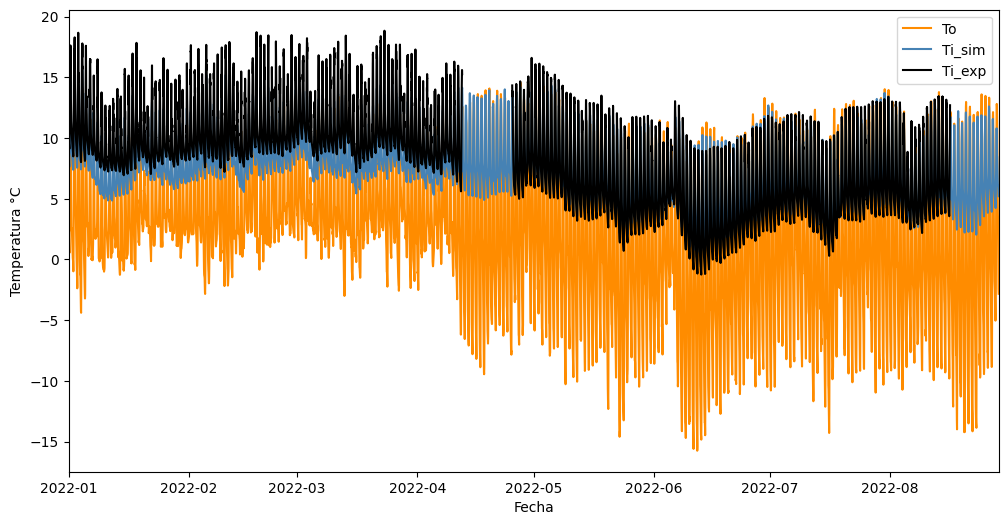

In [5]:
fig, ax = plt.subplots(figsize = (12,6))
fecha1 = parse('2022-01-01')
fecha2 = fecha1 + pd.Timedelta('240D')

ax.plot(eplus.To, 'darkorange' , label = 'To')
ax.plot(eplus.modulo, 'steelblue', label = 'Ti_sim')
ax.plot(hobo.T_int1, 'k-', label = 'Ti_exp')


ax.set_xlim(fecha1, fecha2)
#ax.set_ylim(5, 12)

plt.xlabel('Fecha')
plt.ylabel('Temperatura °C')
ax.legend()

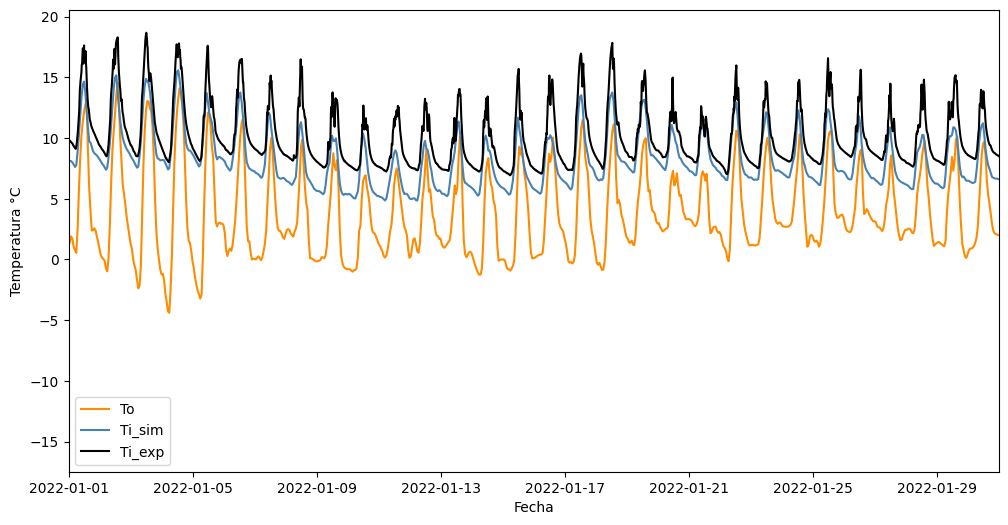

In [6]:
fig, ax = plt.subplots(figsize = (12,6))
fecha1 = parse('2022-01-01')
fecha2 = fecha1 + pd.Timedelta('30D')

ax.plot(eplus.To, 'darkorange' , label = 'To')
ax.plot(eplus.modulo, 'steelblue', label = 'Ti_sim')
ax.plot(hobo.T_int1, 'k-', label = 'Ti_exp')


ax.set_xlim(fecha1, fecha2)
#ax.set_ylim(5, 12)

plt.xlabel('Fecha')
plt.ylabel('Temperatura °C')
ax.legend()

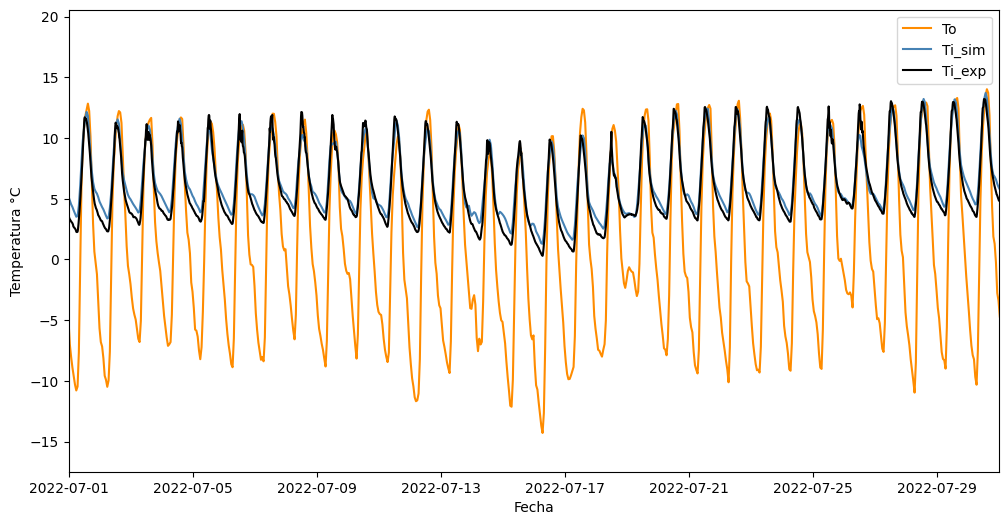

In [7]:
fig, ax = plt.subplots(figsize = (12,6))
fecha1 = parse('2022-07-01')
fecha2 = fecha1 + pd.Timedelta('30D')

ax.plot(eplus.To, 'darkorange' , label = 'To')
ax.plot(eplus.modulo, 'steelblue', label = 'Ti_sim')
ax.plot(hobo.T_int1, 'k-', label = 'Ti_exp')


ax.set_xlim(fecha1, fecha2)
#ax.set_ylim(5, 12)

plt.xlabel('Fecha')
plt.ylabel('Temperatura °C')
ax.legend()